In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
from tensorflow.keras.datasets import mnist

In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

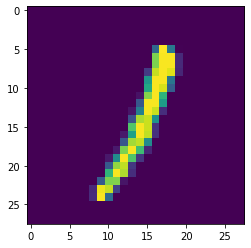

In [15]:
plt.imshow(X_train[99])

In [16]:
X_train = X_train/255

In [17]:
X_test = X_test/255

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [19]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [20]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [21]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['accuracy'])

In [25]:
autoencoder.fit(X_train, X_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1668 - accuracy: 0.1858
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1521 - accuracy: 0.2074
Epoch 3/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1439 - accuracy: 0.2201
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1393 - accuracy: 0.2275
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1357 - accuracy: 0.2333


In [26]:
passed_images = autoencoder.predict(X_test[:10])

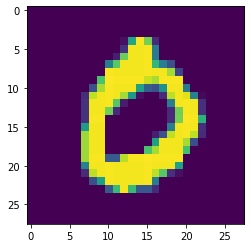

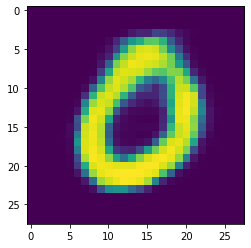

In [29]:
n = 3

plt.imshow(X_test[n])
plt.show()
plt.imshow(passed_images[n])

In [30]:
from tensorflow.keras.layers import GaussianNoise

In [31]:
sample = GaussianNoise(0.2)

In [36]:
noisy = sample(X_test[:10], training=True)

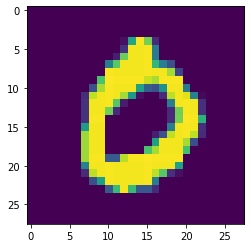

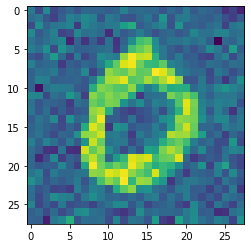

In [37]:
n = 3

plt.imshow(X_test[n])
plt.show()
plt.imshow(noisy[n])
plt.show()

In [38]:
import tensorflow as tf

In [40]:
tf.random.set_seed(101)
np.random.seed(101)

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [41]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [42]:
noise_remover = Sequential([encoder,decoder])

In [43]:
noise_remover.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [44]:
noise_remover.fit(X_train, X_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1703 - accuracy: 0.1821
Epoch 2/8
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1295 - accuracy: 0.2322
Epoch 3/8
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1209 - accuracy: 0.2446
Epoch 4/8
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1160 - accuracy: 0.2537
Epoch 5/8
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1131 - accuracy: 0.2589
Epoch 6/8
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1104 - accuracy: 0.2633
Epoch 7/8
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1079 - accuracy: 0.2672
Epoch 8/8
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1059 - accuracy: 0.2711


In [48]:
ten_noisy_images = sample(X_test[:10], training=True)

In [49]:
denoisy = noise_remover(ten_noisy_images)

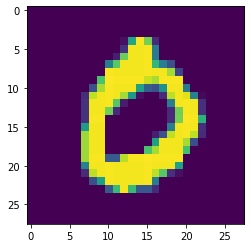

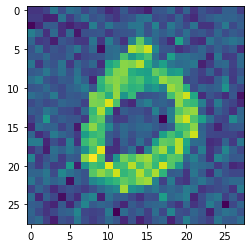

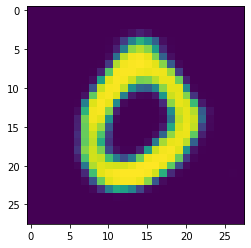

In [50]:
n = 3

plt.imshow(X_test[n])
plt.show()

plt.imshow(ten_noesy_images[n])
plt.show()

plt.imshow(denoisy[n])
plt.show()